You are given an integer eventTime denoting the duration of an event. You are also given two integer arrays startTime and endTime, each of length n.

These represent the start and end times of n non-overlapping meetings that occur during the event between time t = 0 and time t = eventTime, where the ith meeting occurs during the time [startTime[i], endTime[i]].

You can reschedule at most one meeting by moving its start time while maintaining the same duration, such that the meetings remain non-overlapping, to maximize the longest continuous period of free time during the event.

Return the maximum amount of free time possible after rearranging the meetings.

Note that the meetings can not be rescheduled to a time outside the event and they should remain non-overlapping.

Note: In this version, it is valid for the relative ordering of the meetings to change after rescheduling one meeting.

 

Example 1:

Input: eventTime = 5, startTime = [1,3], endTime = [2,5]

Output: 2

Explanation:

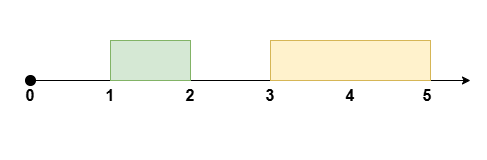

Reschedule the meeting at [1, 2] to [2, 3], leaving no meetings during the time [0, 2].

Example 2:

Input: eventTime = 10, startTime = [0,7,9], endTime = [1,8,10]

Output: 7

Explanation:

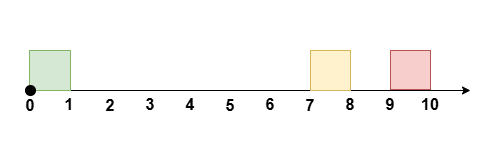

Reschedule the meeting at [0, 1] to [8, 9], leaving no meetings during the time [0, 7].

Example 3:

Input: eventTime = 10, startTime = [0,3,7,9], endTime = [1,4,8,10]

Output: 6

Explanation:

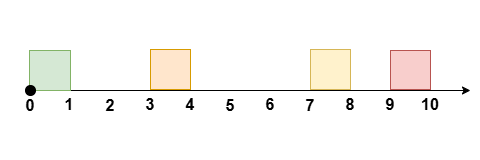

Reschedule the meeting at [3, 4] to [8, 9], leaving no meetings during the time [1, 7].

Example 4:

Input: eventTime = 5, startTime = [0,1,2,3,4], endTime = [1,2,3,4,5]

Output: 0

Explanation:

There is no time during the event not occupied by meetings.

 

Constraints:

    1 <= eventTime <= 109
    n == startTime.length == endTime.length
    2 <= n <= 105
    0 <= startTime[i] < endTime[i] <= eventTime
    endTime[i] <= startTime[i + 1] where i lies in the range [0, n - 2].



In [ ]:
class Solution:
    def maxFreeTime(self, eventTime: int, startTime: List[int], endTime: List[int]) -> int:
        n = len(startTime)
        q = [False] * n
        t1 = 0
        t2 = 0
        for i in range(n):
            if endTime[i] - startTime[i] <= t1:
                q[i] = True
            t1 = max(t1, startTime[i] - (0 if i == 0 else endTime[i - 1]))

            if endTime[n - i - 1] - startTime[n - i - 1] <= t2:
                q[n - i - 1] = True
            t2 = max(
                t2,
                (eventTime if i == 0 else startTime[n - i])
                - endTime[n - i - 1],
            )

        res = 0
        for i in range(n):
            left = 0 if i == 0 else endTime[i - 1]
            right = eventTime if i == n - 1 else startTime[i + 1]
            if q[i]:
                res = max(res, right - left)
            else:
                res = max(res, right - left - (endTime[i] - startTime[i]))
        return res